<a href="https://colab.research.google.com/github/GMayer09/Imersao_Dados_Python/blob/main/Aula3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [ ]:
df_limpo = df.dropna()

In [ ]:
df_limpo.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


<Axes: title={'center': 'Distribuição de exeperience level'}, xlabel='experience_level'>

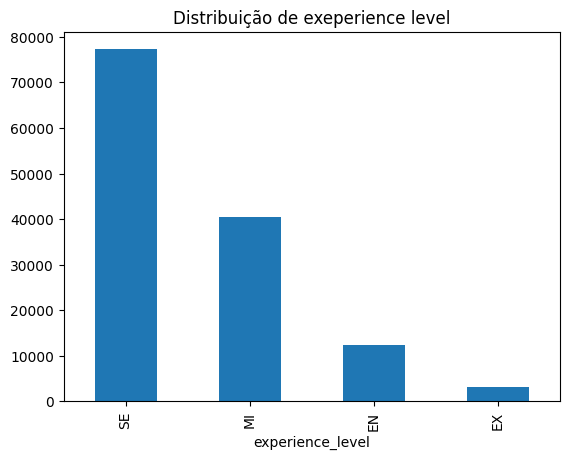

In [ ]:
df_limpo["experience_level"].value_counts().plot(kind="bar", title = "Distribuição de exeperience level")

In [ ]:
import seaborn as sns

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

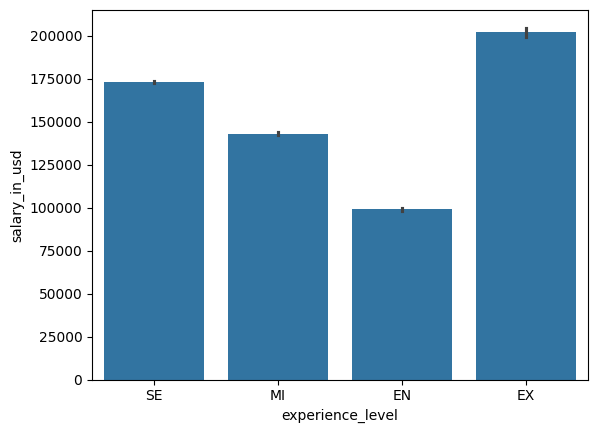

In [ ]:
sns.barplot(data=df_limpo, x="experience_level", y="salary_in_usd")

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Salário médio anual em USD')

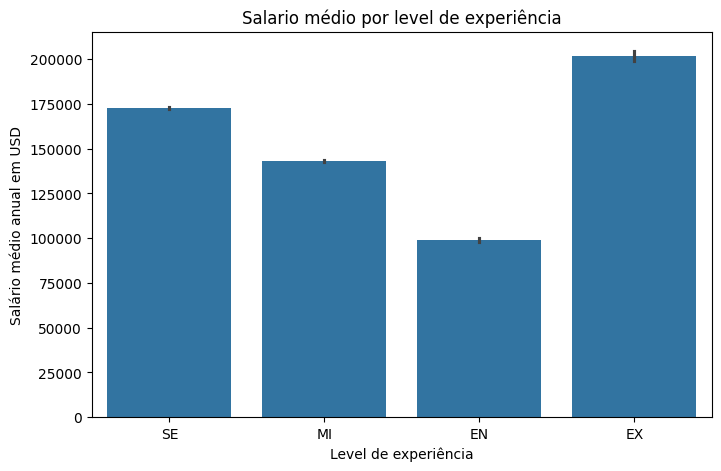

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x="experience_level", y="salary_in_usd")
plt.title("Salario médio por level de experiência")
plt.xlabel("Level de experiência")
plt.ylabel("Salário médio anual em USD")

In [ ]:
df_limpo.groupby("experience_level")["salary_in_usd"].mean().sort_values(ascending=False)

,salary_in_usd
experience_level,
EX,202027.667813
SE,172850.838301
MI,143044.845979
EN,99034.963267


In [ ]:
ordem = df_limpo.groupby("experience_level")["salary_in_usd"].mean().sort_values(ascending=False).index

In [ ]:
ordem

Index(['EX', 'SE', 'MI', 'EN'], dtype='object', name='experience_level')

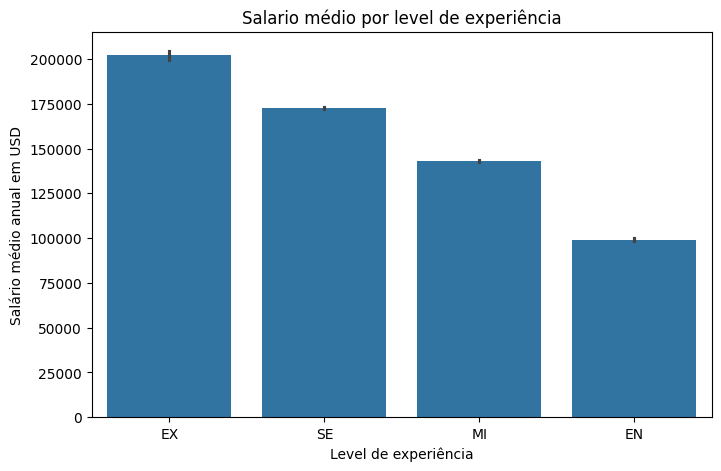

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x="experience_level", y="salary_in_usd", order=ordem)
plt.title("Salario médio por level de experiência")
plt.xlabel("Level de experiência")
plt.ylabel("Salário médio anual em USD")
plt.show()

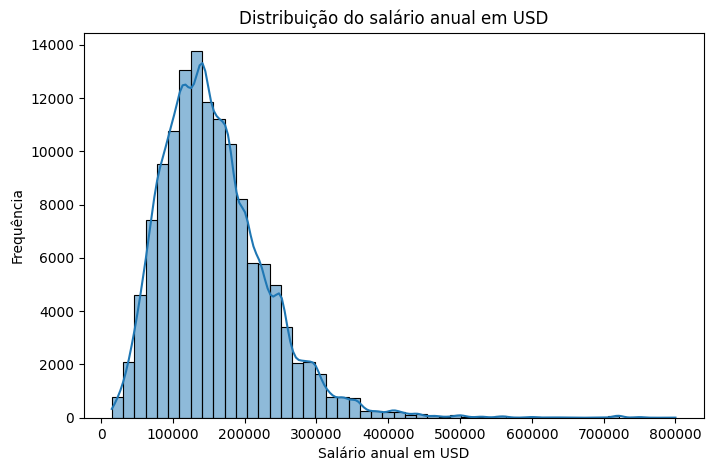

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df_limpo["salary_in_usd"], bins=50, kde=True)
plt.title("Distribuição do salário anual em USD")
plt.xlabel("Salário anual em USD")
plt.ylabel("Frequência")
plt.show()

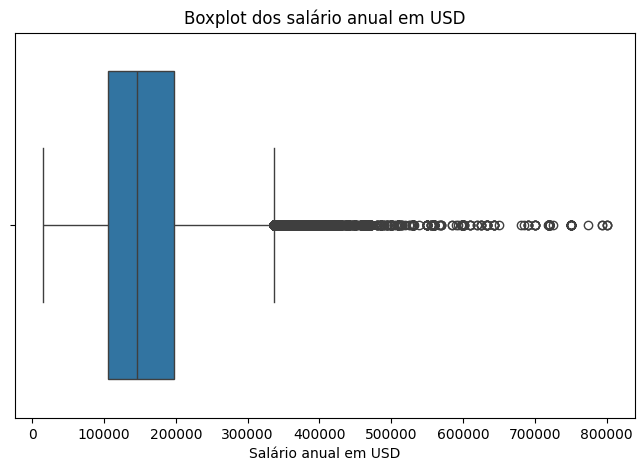

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_limpo["salary_in_usd"])
plt.title("Boxplot dos salário anual em USD")
plt.xlabel("Salário anual em USD")
plt.show()

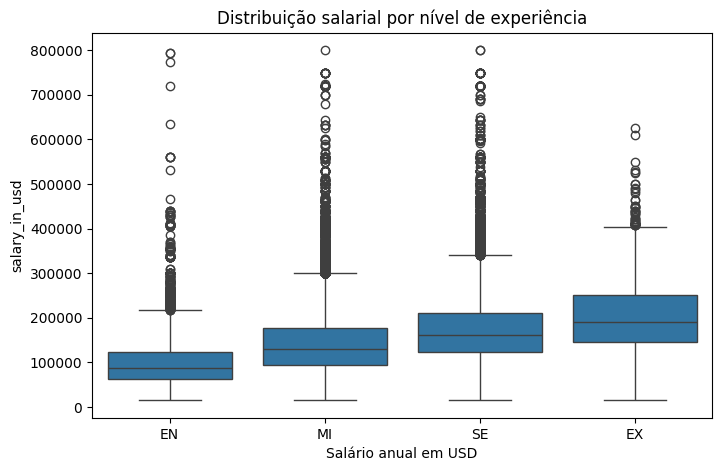

In [ ]:
ordem_level = ["EN", "MI", "SE", "EX"]
plt.figure(figsize=(8, 5))
sns.boxplot(x="experience_level", y="salary_in_usd", data=df_limpo, order=ordem_level)
plt.title("Distribuição salarial por nível de experiência")
plt.xlabel("Salário anual em USD")
plt.show()

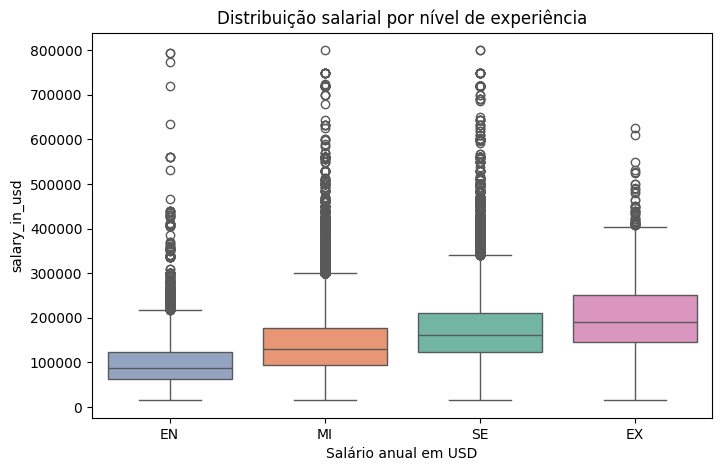

In [ ]:
ordem_level = ["EN", "MI", "SE", "EX"]
plt.figure(figsize=(8, 5))
sns.boxplot(x="experience_level", y="salary_in_usd", data=df_limpo, order=ordem_level, palette="Set2", hue="experience_level")
plt.title("Distribuição salarial por nível de experiência")
plt.xlabel("Salário anual em USD")
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
df_salary_by_experience = df_limpo.groupby("experience_level")["salary_in_usd"].mean().sort_values(ascending=False).reset_index()
fig = px.bar(df_salary_by_experience,
             x="experience_level",
             y="salary_in_usd",
             title="Média salarial por nível de experiência",
             labels={"experience_level": "Nível de Experiência", "salary_in_usd": "Média Salarial Anual (USD)"},
             height=400, width=600)
fig.show()

In [ ]:
remoto_contagem = df_limpo["remote_ratio"].value_counts().reset_index()
remoto_contagem.columns = ["employment_type", "quantidade"]
remoto_contagem
fig = px.pie(remoto_contagem,
             names="employment_type",
             values="quantidade",
             title="Distribuição de Employment Type")
fig.show()

In [ ]:
remoto_contagem = df_limpo["remote_ratio"].value_counts().reset_index()
remoto_contagem.columns = ["employment_type", "quantidade"]
remoto_contagem
fig = px.pie(remoto_contagem,
             names="employment_type",
             values="quantidade",
             title="Distribuição de Employment Type",
             hole=0.5)
fig.show()

In [ ]:
remoto_contagem = df_limpo["remote_ratio"].value_counts().reset_index()
remoto_contagem.columns = ["employment_type", "quantidade"]
remoto_contagem
fig = px.pie(remoto_contagem,
             names="employment_type",
             values="quantidade",
             title="Distribuição de Employment Type",
             hole=0.5)
fig.update_traces(textinfo="percent+label")
fig.show()